# Author: Pawan
# DSBI Intern @ The Spark Foundation

## Task 1: Prediction using Supervised ML
### Description of Problem: 
* ### Predict the percentage of an student based on the no. of study hours.
* ### This is a simple linear regression task as it involves just 2 variables.
* ### Practitioner can get the dataset link from here.[Dataset Link](https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv)

## Import all the libraries/modules which are required for completion of the task.

In [216]:
import pandas as pd                                       #  <- to read data from source link.
import numpy as np                                        #  <- to deal with matrix operations.
from sklearn.model_selection import train_test_split      #  <- to split dataset in train set and test dataset.
from sklearn.linear_model import LinearRegression         #  <- to create the linear regression model.
from sklearn import metrics                               #  <- to evaluate our model accuracy.                
import matplotlib.pyplot as plt                           #  <- to plot the graphs(visualiztion of data).


# Step 1 : Reading the data from source(provided link)

In [217]:
Dataset_url = r"https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv"
Dataset = pd.read_csv(Dataset_url)

Dataset.tail()                                            #  <-  to see last five entries/rows of dataset

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


### Now check if there are any missing values in your dataset or not.
   * if present then deal with it.
   * else continue to next step.  

In [218]:
Dataset.isnull().sum()                                     #  <- to check no. of missing values in each column.

Hours     0
Scores    0
dtype: int64

#### Conclusion : Our dataset does not contain any missing value. So we can move further.

# Step 2 : Input data visualization.

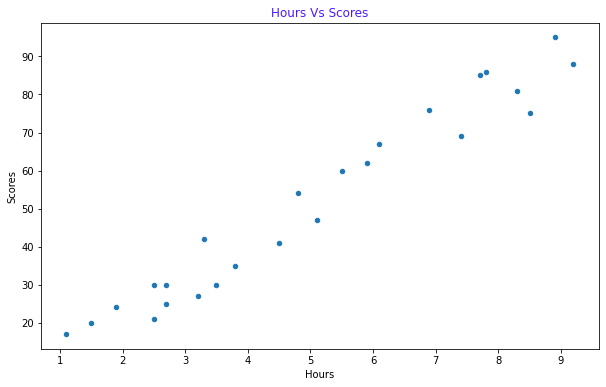

In [219]:
Dataset.plot(x='Hours', y='Scores',kind='scatter',figsize=(10,6))           # <- plotting data of dataset 
plt.title("Hours Vs Scores",color=(0.3,0.1,1))                              # <- setting the title of graph                            
plt.show()                                                                  # <- display/render graph.  

# Step 3 : Data preprocessing

In [220]:
independent_variables = Dataset.iloc[:,:-1].values           # <- columns that help in prediction.
dependent_variables = Dataset.iloc[:,-1].values              # <- columns whose values are predicted by model.    

# Step 4 : Train your model
  * ### first split dataset in training set and test set.
  * ### Then Train your model on Training set.

In [221]:
x_train, x_test, y_train, y_test = train_test_split(independent_variables,dependent_variables,test_size=0.20,shuffle=True)                                             # <- splitting of dataset into train and test set.

In [222]:
regressor = LinearRegression()                            # <- created an object of linear regression class
regressor.fit(x_train,y_train)                            # <- object is getting trained on train set.   

LinearRegression()

### training is complete

# Step 5 : Hidden relationship that our model has adapted.
- ### let's check how good our model is aligned to actual relationship.

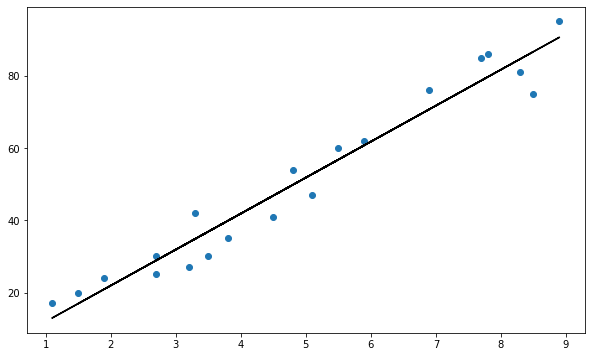

In [223]:
y_pred = regressor.predict(x_train)                        # <- getting predicted y-axis values for train set.
plt.figure(figsize=(10,6))                                 # <- setting the size of graph.
plt.scatter(x_train,y_train)                               # <- putting the original values on graph( Dots )
plt.plot(x_train,y_pred, color='black')                    # <- plotting the best-fit line of regression
plt.show()                                                 # <- display graph.

# Step 6 : Test Our Model.
  * Now we will test our model by making prection on test set data.
  * Once predictions are made then compare it to actual results.
  * Calculate training and test score

In [224]:
prediction_on_x_test = regressor.predict(x_test)                # <- Now we are making prediction on x_test
prediction_on_x_test = prediction_on_x_test.astype(int)         # <- we convert its type to integer from float.
prediction_on_x_test

array([75, 26, 62, 26, 93])

In [225]:
actual_and_predicted = pd.DataFrame({"Hours":x_test.reshape(-1), "Actual_score": y_test, "Predicted_score": prediction_on_x_test})
actual_and_predicted

,Hours,Actual_score,Predicted_score
0,7.4,69,75
1,2.5,21,26
2,6.1,67,62
3,2.5,30,26
4,9.2,88,93


## Visualization of actual vs predicted result

In [226]:
actual_and_predicted.set_index("Hours",inplace=True)          # <- set "Hours" column as index.

<AxesSubplot:xlabel='Hours'>

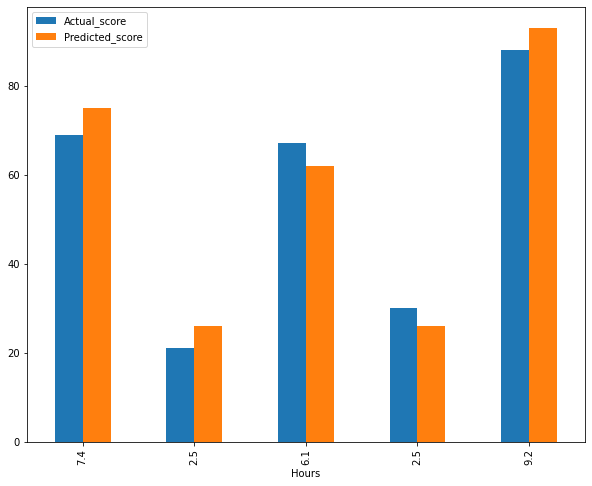

In [237]:
actual_and_predicted.plot.bar(figsize=(10,8))

In [228]:
training_score = regressor.score(x_train, y_train)            
test_score = regressor.score(x_test, y_test)           
print("training score: {}\ntest score: {}".format(training_score,test_score))

training score: 0.9508247876994443
test score: 0.95674114322853


## About training and test score
* If difference between test score and training score is small, means it is a good model.
* Usually, high training score and low test score is over-fitting. 
* Very low training score and low test score is under-fitting.

In [229]:
### Test model with your own data
test = np.array([6]).reshape(1,-1)
pred = regressor.predict(test)
print("hours: {}\npredicted_score: {}".format(test[0][0],int(pred[0])))


hours: 6
predicted_score: 61


# Step 7 : Final step(Evaluate performance of our model)
* Calculate Mean absolute error.
* Calculate Root mean squared error.
* Calculate R2 score(R-squared value).


In [234]:
print("Mean absolute error: {}".format(metrics.mean_absolute_error(y_test,prediction_on_x_test)))
print("Mean absolute error: {}".format(np.sqrt(metrics.mean_squared_error(y_test,prediction_on_x_test))))
print("R2 score: {}".format(metrics.r2_score(y_test,prediction_on_x_test)))

Mean absolute error: 5.0
Mean absolute error: 5.039841267341661
R2 score: 0.9604361370716511


 ## Result
* R-squared is a goodness-of-fit measure for linear regression models. R-squared is a statistical measure of how close the data are to the fitted regression line. 
* In our case R-squared(R2) = 0.9604361370716511, which is a good thing.

# Conclusion

## Task 1 Completed
- [&#9745;]  Model is trained using Supervised Machine Learning method  
- [&#9745;]  Model works on Linear regression Algorithm.
- [&#9745;]  Visual representation of different datas.
- [&#9745;]  Model is able to make prediction with high accuracy.
- [&#9745;]  Model performance is evaluated using different parameters.

# Thank you
